In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

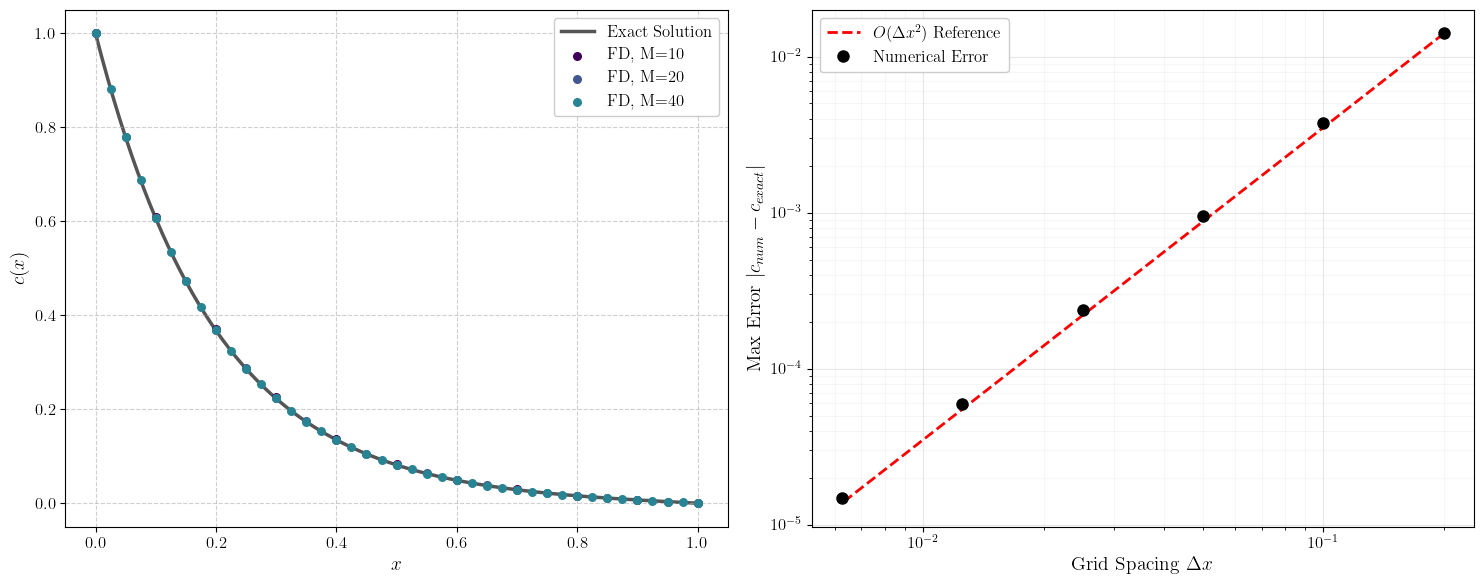

In [5]:
def exact_solution(x, alpha=5.0):
    return np.sinh(alpha * (1 - x)) / np.sinh(alpha)

def solve_finite_difference(M, alpha=5.0):
    x = np.linspace(0, 1, M + 1)
    dx = 1.0 / M
    N_unknowns = M - 1
    
    main_diag = -(2 + alpha**2 * dx**2) * np.ones(N_unknowns)
    off_diag = np.ones(N_unknowns - 1)
    
    A = np.diag(main_diag) + np.diag(off_diag, 1) + np.diag(off_diag, -1)
    
    b = np.zeros(N_unknowns)
    b[0] -= 1.0 
    
    c_inner = np.linalg.solve(A, b)
    
    c = np.concatenate(([1.0], c_inner, [0.0]))
    return x, c

alpha_val = 5.0
M_values_plot = [10, 20, 40]
M_values_conv = [5, 10, 20, 40, 80, 160]

x_smooth = np.linspace(0, 1, 200)
c_exact_smooth = exact_solution(x_smooth, alpha_val)

fd_results = []
for M in M_values_plot:
    x_num, c_num = solve_finite_difference(M, alpha_val)
    fd_results.append((M, x_num, c_num))

dx_list = []
max_errors = []

for M in M_values_conv:
    dx = 1.0 / M
    x_num, c_num = solve_finite_difference(M, alpha_val)
    
    c_ex_nodes = exact_solution(x_num, alpha_val)
    err = np.max(np.abs(c_num - c_ex_nodes))
    
    dx_list.append(dx)
    max_errors.append(err)

dx_list = np.array(dx_list)
max_errors = np.array(max_errors)

C_const = max_errors[0] / (dx_list[0]**2)
ref_line = C_const * dx_list**2

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

ax1 = axes[0]
ax1.plot(x_smooth, c_exact_smooth, color='#555555', linewidth=2.5, label='Exact Solution', zorder=1)

colors = ['#3E0058', '#425792', '#288493']

for idx, (M, xn, cn) in enumerate(fd_results):
    ax1.scatter(xn, cn, color=colors[idx], s=30, label=f'FD, M={M}', zorder=2 + idx)

ax1.set_xlabel('$x$', fontsize=14)
ax1.set_ylabel('$c(x)$', fontsize=14)
ax1.set_xlim(-0.05, 1.05)
ax1.set_ylim(-0.05, 1.05)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(loc='upper right', frameon=True, framealpha=1.0)

ax2 = axes[1]

ax2.loglog(dx_list, ref_line, '--', color='red', linewidth=2, label='$O(\Delta x^2)$ Reference')

ax2.loglog(dx_list, max_errors, 'o', color='black', markersize=8, label='Numerical Error', zorder=3)

ax2.set_xlabel('Grid Spacing $\Delta x$', fontsize=14)
ax2.set_ylabel('Max Error $|c_{num} - c_{exact}|$', fontsize=14)
ax2.grid(True, which='major', linestyle='-', alpha=0.3)
ax2.grid(True, which='minor', linestyle='-', alpha=0.1)
ax2.legend(loc='upper left', frameon=True, framealpha=1.0)

plt.tight_layout()
plt.savefig('../../../figs/ode/finite_difference_convergence.pdf', bbox_inches='tight', transparent=True)
plt.show()